In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], 28*28))
X_test = np.reshape(X_test, (X_test.shape[0], 28*28))

# Convert the labels to categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [3]:
from keras.models import Sequential
from keras.layers import Dense




In [4]:
def create_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

Epoch 1/10
48000/48000 [==============================] - 205s 4ms/step - loss: 0.2439 - accuracy: 0.9254 - val_loss: 0.1541 - val_accuracy: 0.9514
Epoch 2/10
48000/48000 [==============================] - 217s 5ms/step - loss: 0.1159 - accuracy: 0.9645 - val_loss: 0.1186 - val_accuracy: 0.9641
Epoch 3/10
48000/48000 [==============================] - 245s 5ms/step - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.1190 - val_accuracy: 0.9635
Epoch 4/10
48000/48000 [==============================] - 181s 4ms/step - loss: 0.0670 - accuracy: 0.9790 - val_loss: 0.1025 - val_accuracy: 0.9698
Epoch 5/10
48000/48000 [==============================] - 165s 3ms/step - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 6/10
48000/48000 [==============================] - 165s 3ms/step - loss: 0.0471 - accuracy: 0.9845 - val_loss: 0.0983 - val_accuracy: 0.9743
Epoch 7/10
48000/48000 [==============================] - 165s 3ms/step - loss: 0.0390 - accuracy: 0.9872 - val_

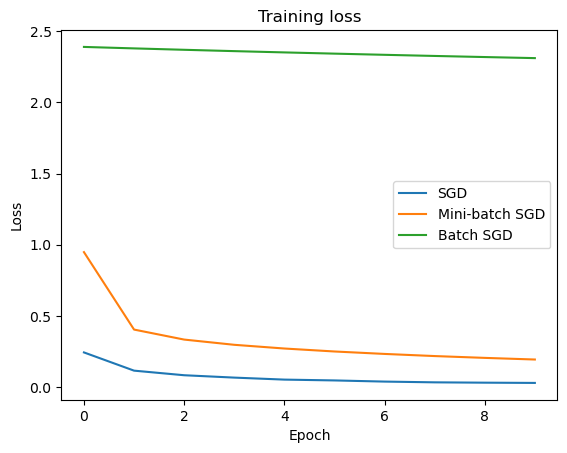

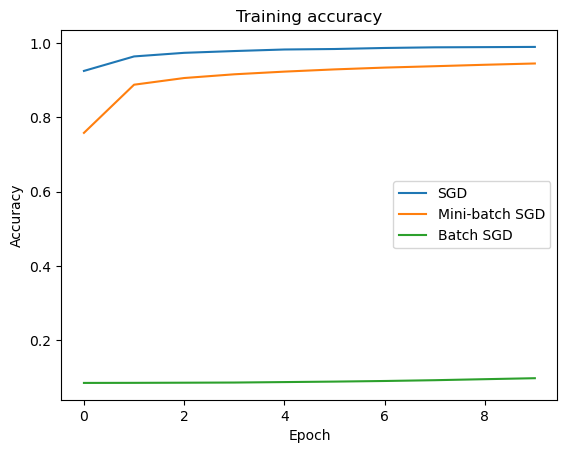

SGD training time:  4102.445629835129
Mini-batch SGD training time:  41.38225293159485
Batch SGD training time:  7.446434259414673


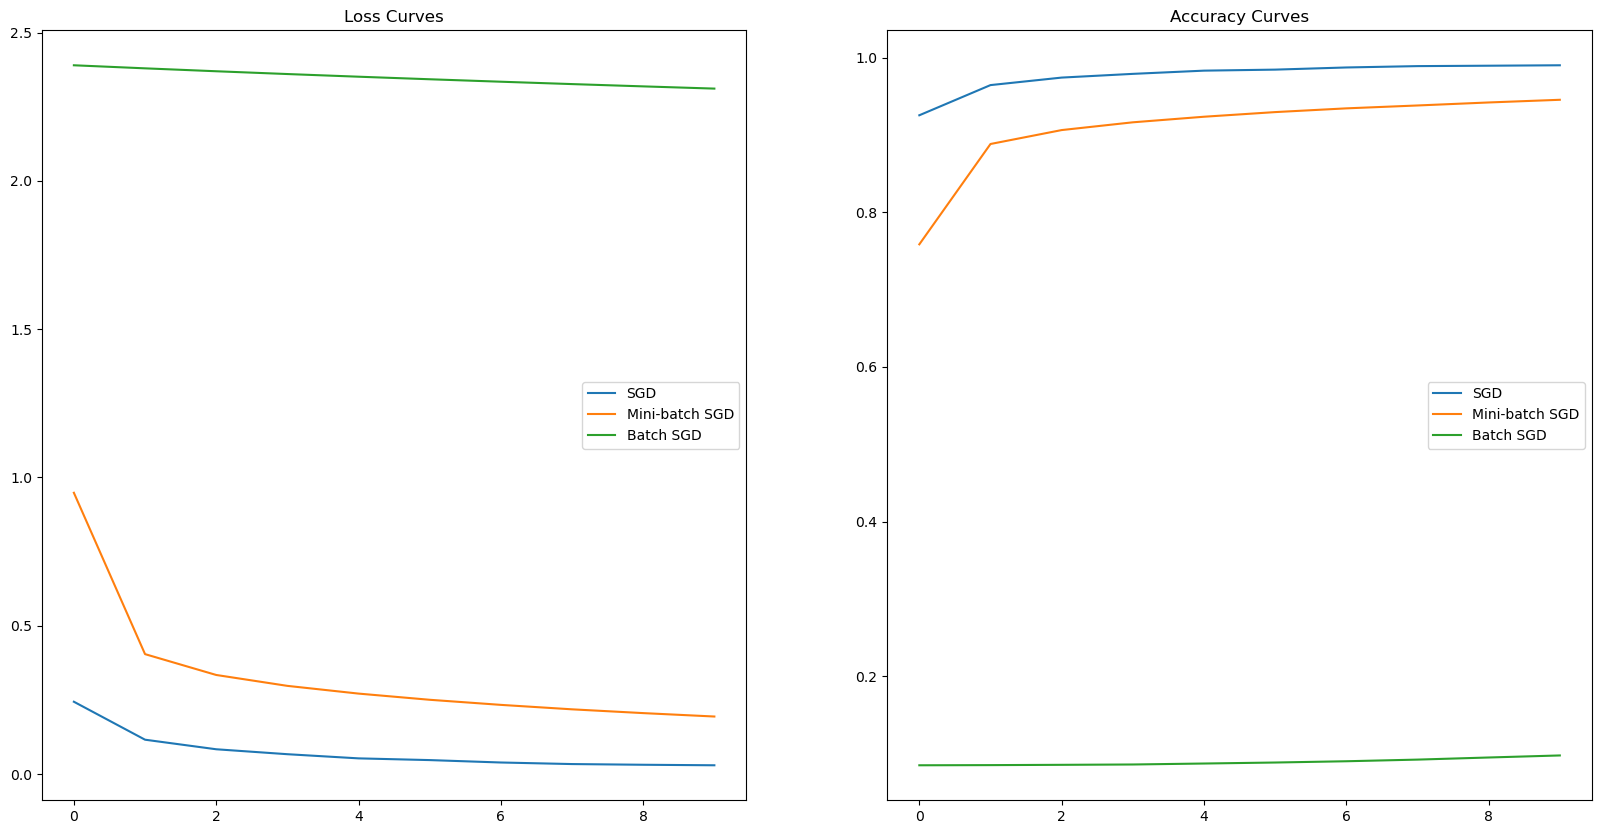

In [8]:
import time
import matplotlib.pyplot as plt
epochs = 10
# Train the model using SGD
model1 = create_model()
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
sgd_start_time = time.time()
sgd_history = model1.fit(X_train, y_train, batch_size=1, epochs=epochs, validation_data=(X_val, y_val), verbose=1, shuffle=True)
sgd_end_time = time.time()

# Train the model using mini-batch SGD
model2 = create_model()
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
mini_batch_sgd_start_time = time.time()
mini_batch_sgd_history = model2.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val), verbose=1, shuffle=True)
mini_batch_sgd_end_time = time.time()

# Train the model using batch SGD
model3 = create_model()
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
batch_sgd_start_time = time.time()
batch_sgd_history = model3.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=epochs, validation_data=(X_val, y_val), verbose=1, shuffle=True)
batch_sgd_end_time = time.time()

# Plot the learning curves
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(mini_batch_sgd_history.history['loss'], label='Mini-batch SGD')
plt.plot(batch_sgd_history.history['loss'], label='Batch SGD')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(mini_batch_sgd_history.history['accuracy'], label='Mini-batch SGD')
plt.plot(batch_sgd_history.history['accuracy'], label='Batch SGD')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate training time for each strategy
sgd_end_time = time.time()
print('SGD training time: ', sgd_end_time - sgd_start_time)

mini_batch_sgd_end_time = time.time()
print('Mini-batch SGD training time: ', mini_batch_sgd_end_time - mini_batch_sgd_start_time)

batch_sgd_end_time = time.time()
print('Batch SGD training time: ', batch_sgd_end_time - batch_sgd_start_time)

# Plot the learning curves for each strategy
plt.figure(figsize=(20, 10))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(sgd_history.history['loss'], label='SGD')
plt.plot(mini_batch_sgd_history.history['loss'], label='Mini-batch SGD')
plt.plot(batch_sgd_history.history['loss'], label='Batch SGD')
plt.legend()
plt.title('Loss Curves')

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(mini_batch_sgd_history.history['accuracy'], label='Mini-batch SGD')
plt.plot(batch_sgd_history.history['accuracy'], label='Batch SGD')
plt.legend()
plt.title('Accuracy Curves')

plt.show()



In [9]:
# Calculate training time for each strategy
sgd_end_time = time.time()
print('SGD training time: ', sgd_end_time - sgd_start_time)

mini_batch_sgd_end_time = time.time()
print('Mini-batch SGD training time: ', mini_batch_sgd_end_time - mini_batch_sgd_start_time)

batch_sgd_end_time = time.time()
print('Batch SGD training time: ', batch_sgd_end_time - batch_sgd_start_time)

SGD training time:  4103.185613870621
Mini-batch SGD training time:  42.12123441696167
Batch SGD training time:  8.186431407928467


In [7]:
from keras.callbacks import LearningRateScheduler
import time
def learning_rate_decay(epoch, initial_learning_rate, decay):
    return initial_learning_rate / (1 + decay * epoch)

decay = 1e-6
mini_batch_sgd_decay_start_time = time.time()

model4 = create_model()
model4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
lr_decay_callback = LearningRateScheduler(lambda epoch: learning_rate_decay(epoch, initial_learning_rate=0.01, decay=decay))
mini_batch_sgd_decay_history = model4.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), verbose=1, shuffle=True, callbacks=[lr_decay_callback])
mini_batch_sgd_decay_end_time = time.time()
print('Mini-batch SGD with decay training time: ', mini_batch_sgd_decay_end_time - mini_batch_sgd_decay_start_time)


Epoch 1/10
750/750 [==============================] - 9s 7ms/step - loss: 1.0136 - accuracy: 0.7399 - val_loss: 0.4787 - val_accuracy: 0.8683 - lr: 0.0100
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4067 - accuracy: 0.8881 - val_loss: 0.3564 - val_accuracy: 0.8992 - lr: 0.0100
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3347 - accuracy: 0.9051 - val_loss: 0.3117 - val_accuracy: 0.9128 - lr: 0.0100
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2994 - accuracy: 0.9146 - val_loss: 0.2835 - val_accuracy: 0.9185 - lr: 0.0100
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2739 - accuracy: 0.9218 - val_loss: 0.2633 - val_accuracy: 0.9243 - lr: 0.0100
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2543 - accuracy: 0.9279 - val_loss: 0.2460 - val_accuracy: 0.9286 - lr: 0.0100
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - lo

In [13]:
#SGD with momentum
from keras.optimizers import SGD

sgd_momentum = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5 = create_model()
model5.compile(optimizer=sgd_momentum, loss='categorical_crossentropy', metrics=['accuracy'])
sgd_momentum_start_time = time.time()
sgd_momentum_history = model5.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_val, y_val), verbose=1, shuffle=True)
sgd_momentum_end_time = time.time()

print('SGD with momentum training time: ', sgd_momentum_end_time - sgd_momentum_start_time)


Epoch 1/10
48000/48000 [==============================] - 152s 3ms/step - loss: 2.2748 - accuracy: 0.1288 - val_loss: 2.3222 - val_accuracy: 0.0980
Epoch 2/10
48000/48000 [==============================] - 167s 3ms/step - loss: 2.3215 - accuracy: 0.1051 - val_loss: 2.3137 - val_accuracy: 0.0995
Epoch 3/10
48000/48000 [==============================] - 169s 4ms/step - loss: 2.3210 - accuracy: 0.1019 - val_loss: 2.3356 - val_accuracy: 0.0995
Epoch 4/10
48000/48000 [==============================] - 168s 3ms/step - loss: 2.3206 - accuracy: 0.1004 - val_loss: 2.3135 - val_accuracy: 0.0967
Epoch 5/10
48000/48000 [==============================] - 159s 3ms/step - loss: 2.3194 - accuracy: 0.1027 - val_loss: 2.3149 - val_accuracy: 0.1102
Epoch 6/10
48000/48000 [==============================] - 161s 3ms/step - loss: 2.3184 - accuracy: 0.1023 - val_loss: 2.3217 - val_accuracy: 0.0981
Epoch 7/10
48000/48000 [==============================] - 161s 3ms/step - loss: 2.3187 - accuracy: 0.1011 - val_

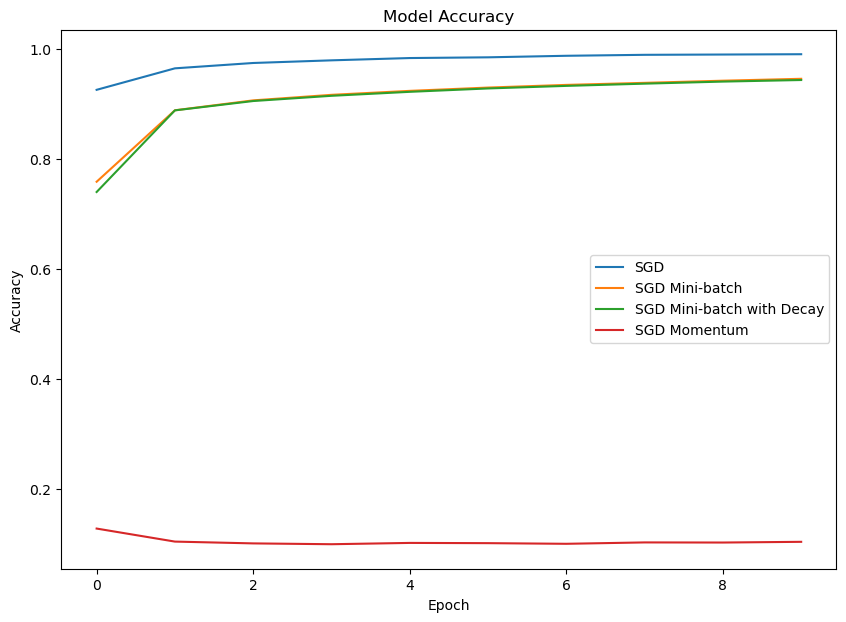

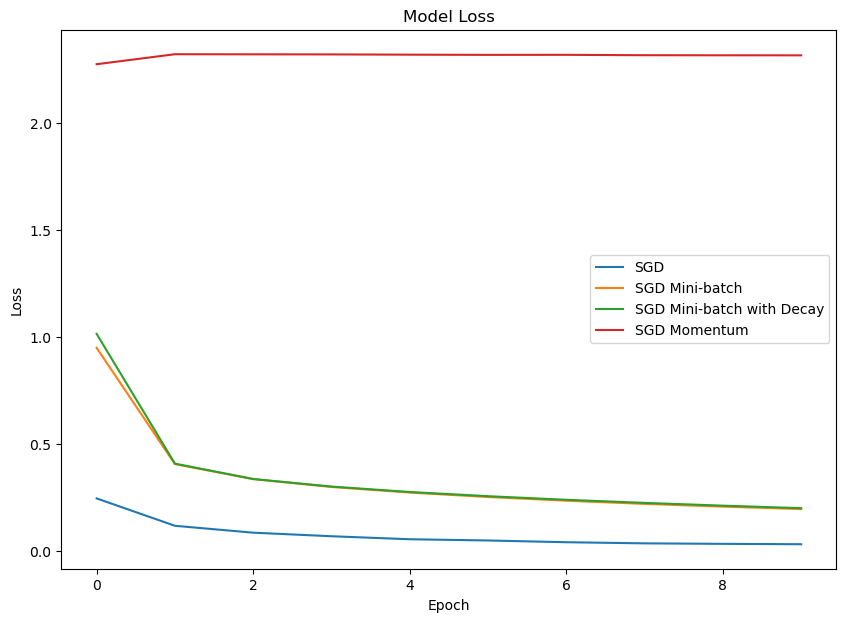

In [14]:
#Plot learning curves for each strategy
plt.figure(figsize=[10,7])
plt.plot(sgd_history.history['accuracy'])
#plt.plot(sgd_history.history['val_accuracy'])
plt.plot(mini_batch_sgd_history.history['accuracy'])
#plt.plot(mini_batch_sgd_history.history['val_accuracy'])
plt.plot(mini_batch_sgd_decay_history.history['accuracy'])
#plt.plot(mini_batch_sgd_decay_history.history['val_accuracy'])
plt.plot(sgd_momentum_history.history['accuracy'])
#plt.plot(sgd_momentum_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['SGD', 'SGD Mini-batch', 'SGD Mini-batch with Decay', 'SGD Momentum', 'Validation SGD', 'Validation SGD Mini-batch', 'Validation SGD Mini-batch with Decay', 'Validation SGD Momentum'], loc='center right')
plt.legend(['SGD', 'SGD Mini-batch', 'SGD Mini-batch with Decay', 'SGD Momentum'], loc='center right')

plt.show()


plt.figure(figsize=[10,7])
plt.plot(sgd_history.history['loss'])
#plt.plot(sgd_history.history['val_loss'])
plt.plot(mini_batch_sgd_history.history['loss'])
#plt.plot(mini_batch_sgd_history.history['val_loss'])
plt.plot(mini_batch_sgd_decay_history.history['loss'])
#plt.plot(mini_batch_sgd_decay_history.history['val_loss'])
plt.plot(sgd_momentum_history.history['loss'])
#plt.plot(sgd_momentum_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['SGD', 'SGD Mini-batch', 'SGD Mini-batch with Decay', 'SGD Momentum'], loc='center right')
plt.show()

In [15]:
print('SGD training time: ', sgd_end_time - sgd_start_time)
print('Mini-batch SGD training time: ', mini_batch_sgd_end_time - mini_batch_sgd_start_time)
print('Mini-batch SGD with decay training time: ', mini_batch_sgd_decay_end_time - mini_batch_sgd_decay_start_time)
print('SGD with momentum training time: ', sgd_momentum_end_time - sgd_momentum_start_time)

SGD training time:  4103.185613870621
Mini-batch SGD training time:  42.12123441696167
Mini-batch SGD with decay training time:  50.52781581878662
SGD with momentum training time:  1633.5437180995941


SGD training time:  4103.185613870621
Mini-batch SGD training time:  42.12123441696167
Mini-batch SGD with decay training time:  50.52781581878662
SGD with momentum training time:  1633.5437180995941


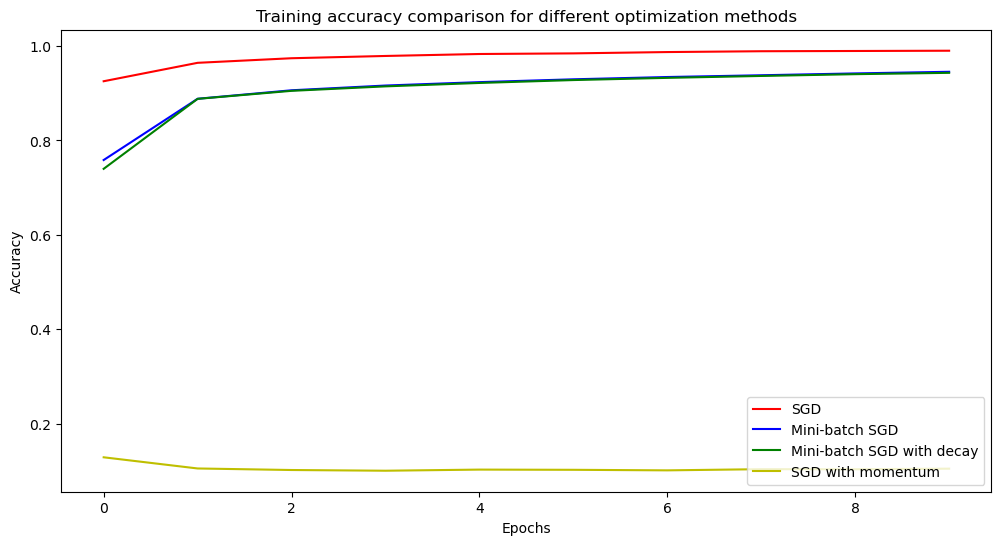

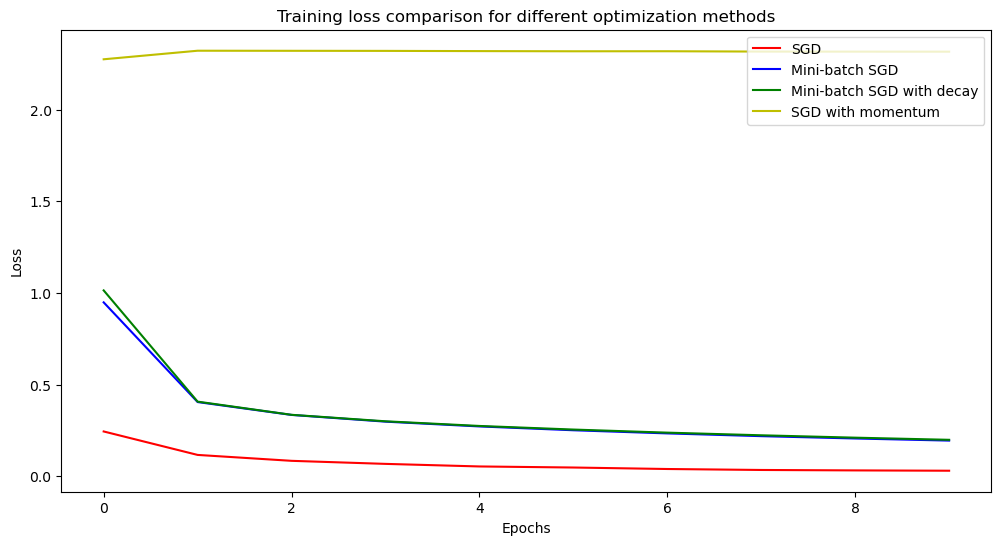

In [16]:
print('SGD training time: ', sgd_end_time - sgd_start_time)
print('Mini-batch SGD training time: ', mini_batch_sgd_end_time - mini_batch_sgd_start_time)
print('Mini-batch SGD with decay training time: ', mini_batch_sgd_decay_end_time - mini_batch_sgd_decay_start_time)
print('SGD with momentum training time: ', sgd_momentum_end_time - sgd_momentum_start_time)

plt.figure(figsize=(12,6))

plt.plot(sgd_history.history['accuracy'], 'r', label='SGD')
plt.plot(mini_batch_sgd_history.history['accuracy'], 'b', label='Mini-batch SGD')
plt.plot(mini_batch_sgd_decay_history.history['accuracy'], 'g', label='Mini-batch SGD with decay')
plt.plot(sgd_momentum_history.history['accuracy'], 'y', label='SGD with momentum')

plt.title('Training accuracy comparison for different optimization methods')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

plt.figure(figsize=(12,6))

plt.plot(sgd_history.history['loss'], 'r', label='SGD')
plt.plot(mini_batch_sgd_history.history['loss'], 'b', label='Mini-batch SGD')
plt.plot(mini_batch_sgd_decay_history.history['loss'], 'g', label='Mini-batch SGD with decay')
plt.plot(sgd_momentum_history.history['loss'], 'y', label='SGD with momentum')

plt.title('Training loss comparison for different optimization methods')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


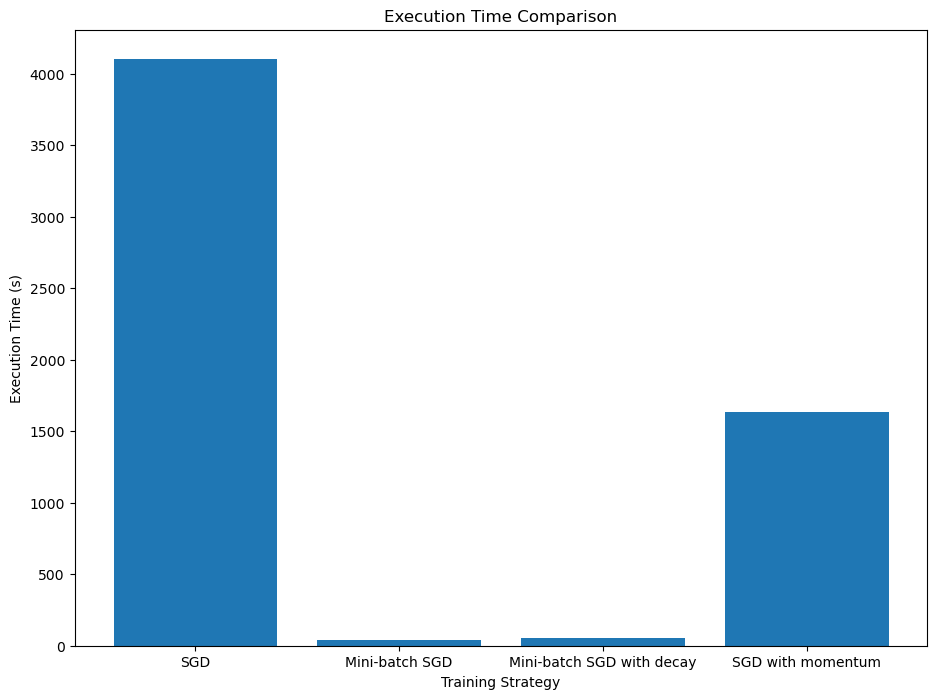

In [17]:
import matplotlib.pyplot as plt

# Plot the execution time for each training strategy
training_times = [sgd_end_time - sgd_start_time, 
                  mini_batch_sgd_end_time - mini_batch_sgd_start_time, 
                  mini_batch_sgd_decay_end_time - mini_batch_sgd_decay_start_time,
                  sgd_momentum_end_time - sgd_momentum_start_time]
training_labels = ['SGD', 'Mini-batch SGD', 'Mini-batch SGD with decay', 'SGD with momentum']
plt.figure(figsize=[11,8])
plt.bar(training_labels, training_times)
plt.title('Execution Time Comparison')
plt.xlabel('Training Strategy')
plt.ylabel('Execution Time (s)')
plt.show()


In [ ]:
import pickle
pickle.dump(model, open('model_best.pkl', 'wb'))

# tp 2 suite

In [26]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


170498071/170498071 [==============================] - 351s 2us/step


In [34]:
from keras.models import Sequential
from keras.layers import Dense

# Define the MLP architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(3072,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [35]:
import time
import matplotlib.pyplot as plt

# Train the model using Mini-batch SGD
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), verbose=1)
end_time = time.time()

# Print the training time
print('Training Time:', end_time - start_time)

# Plot the learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 3072), found shape=(None, 32, 32, 3)


Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 2.0568 - accuracy: 0.2635 - val_loss: 1.9420 - val_accuracy: 0.3039 - lr: 0.0100
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8809 - accuracy: 0.3354 - val_loss: 1.8316 - val_accuracy: 0.3533 - lr: 0.0100
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.8105 - accuracy: 0.3633 - val_loss: 1.7749 - val_accuracy: 0.3753 - lr: 0.0100
Epoch 4/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7704 - accuracy: 0.3786 - val_loss: 1.7548 - val_accuracy: 0.3805 - lr: 0.0099
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7365 - accuracy: 0.3911 - val_loss: 1.7386 - val_accuracy: 0.3817 - lr: 0.0099
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7112 - accuracy: 0.3991 - val_loss: 1.7188 - val_accuracy: 0.3850 - lr: 0.0099
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - l

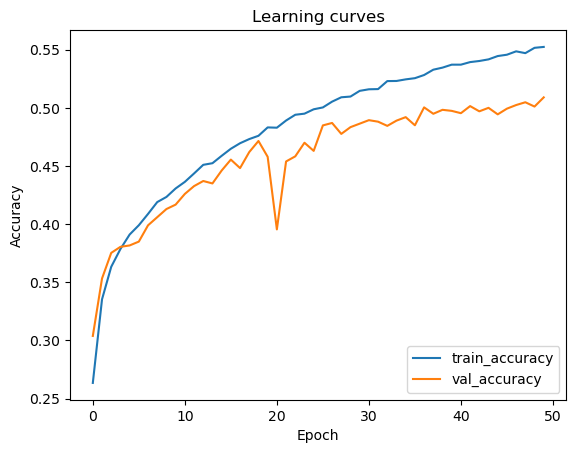

In [36]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras import regularizers
import time
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data by scaling the pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the train set into training and validation sets
val_size = 0.2
val_samples = int(X_train.shape[0] * val_size)
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

# Define the MLP architecture
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Define a function for learning rate decay
def learning_rate_decay(epoch, initial_learning_rate=0.01, decay=0.001):
    return initial_learning_rate / (1 + decay * epoch)

# Train the model using Mini-batch Stochastic Gradient Descent
batch_size = 128
epochs = 50

start_time = time.time()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_val, y_val), verbose=1, shuffle=True,
                    callbacks=[LearningRateScheduler(learning_rate_decay)])

end_time = time.time()

print('Training time: {:.2f} seconds'.format(end_time - start_time))

# Plot the learning curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Learning curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [39]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.regularizers import l2

# Reshape the data to 3072 features
X_train = X_train.reshape(X_train.shape[0], 3072)
X_val = X_val.reshape(X_val.shape[0], 3072)
X_test = X_test.reshape(X_test.shape[0], 3072)

# Define the MLP architecture with L2 norm regularization
model_l2 = Sequential()
model_l2.add(Dense(128, activation='relu', input_shape=(3072,)))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(10, activation='softmax'))

# Compile the model with L2 norm regularization
model_l2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model with L2 norm regularization
l2_start_time = time.time()
history_l2 = model_l2.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), verbose=1)
l2_end_time = time.time()


Epoch 1/50
313/313 [==============================] - 4s 8ms/step - loss: 2.1334 - accuracy: 0.2576 - val_loss: 2.0130 - val_accuracy: 0.2888
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9570 - accuracy: 0.3322 - val_loss: 1.8950 - val_accuracy: 0.3558
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8860 - accuracy: 0.3603 - val_loss: 1.8816 - val_accuracy: 0.3556
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8361 - accuracy: 0.3814 - val_loss: 1.8605 - val_accuracy: 0.3695
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 1.8028 - accuracy: 0.3940 - val_loss: 1.8255 - val_accuracy: 0.3784
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7703 - accuracy: 0.4044 - val_loss: 1.7852 - val_accuracy: 0.3860
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7454 - accuracy: 0.4126 - val_loss: 1.7511 - val_accuracy: 0.4092
Epoch 

In [40]:
#Evaluate the model with L2 norm regularization on the test set
test_loss_l2, test_acc_l2 = model_l2.evaluate(X_test, y_test)

print('Test loss with L2 norm regularization:', test_loss_l2)
print('Test accuracy with L2 norm regularization:', test_acc_l2)

313/313 [==============================] - 3s 9ms/step - loss: 1.5940 - accuracy: 0.4726
Test loss with L2 norm regularization: 1.5939594507217407
Test accuracy with L2 norm regularization: 0.4726000130176544


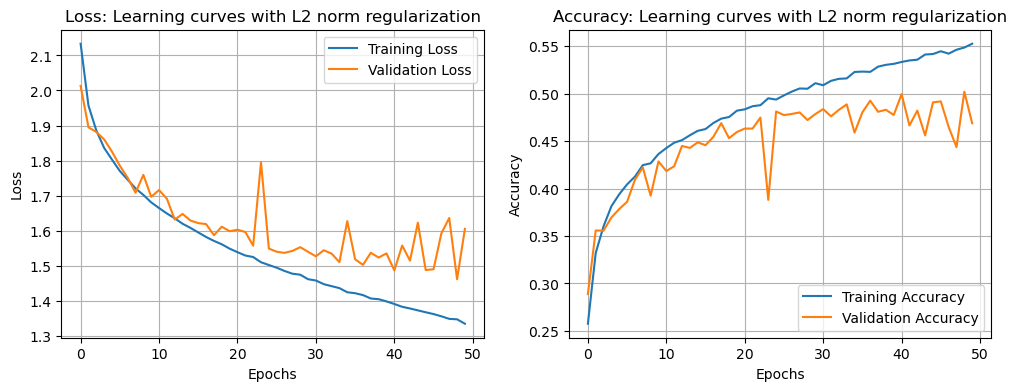

In [42]:
#Plot the learning curves
def plot_learning_curves(loss, val_loss, accuracy, val_accuracy, title=''):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss: ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy: ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
plot_learning_curves(history_l2.history['loss'], history_l2.history['val_loss'], history_l2.history['accuracy'], history_l2.history['val_accuracy'], title='Learning curves with L2 norm regularization')

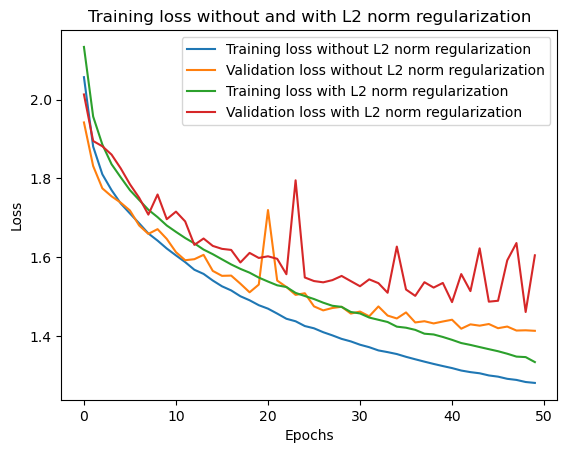

In [65]:
#Compare with the model without L2 norm regularization

def plot_compare_learning_curves(train_losses_1, val_losses_1, train_losses_2, val_losses_2, title, xlabel, ylabel):
    plt.plot(train_losses_1, label='Training loss without L2 norm regularization')
    plt.plot(val_losses_1, label='Validation loss without L2 norm regularization')
    plt.plot(train_losses_2, label='Training loss with L2 norm regularization')
    plt.plot(val_losses_2, label='Validation loss with L2 norm regularization')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves(history.history['loss'], history.history['val_loss'], history_l2.history['loss'], history_l2.history['val_loss'], 'Training loss without and with L2 norm regularization', 'Epochs', 'Loss')

In [53]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the model architecture
def create_model_with_dropout(dropout_rate):
    model = Sequential()
    model.add(Dense(512, input_shape=(784,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    return model

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

# Split the training data into training and validation sets
val_size = 5000
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]
X_train = X_train[:-val_size]
y_train = y_train[:-val_size]

# Train the model with dropout
learning_rate = 0.001
dropout_rate = 0.2
model_dropout = create_model_with_dropout(dropout_rate)
model_dropout.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=None, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
_, accuracy_dropout = model_dropout.evaluate(X_test, y_test, verbose=1)
if accuracy_dropout > best_accuracy:
    best_model = model_dropout
    best_accuracy = accuracy_dropout


ValueError: cannot reshape array of size 153600000 into shape (784)

In [57]:
import time
import random
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data by normalizing and flattening the input images
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
num_classes = 10
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
X_train_full = X_train
y_train_full = y_train
# Define the parameters for the model
input_shape = X_train[0].shape
hidden_layer_size = 512
dropout_rates = [0.2, 0.3, 0.5]
learning_rate = 0.001
batch_sizes = [32, 64, 128]
epochs = 50

# Create a function to build the model
def create_model(dropout_rate=None):
    model = Sequential([
        Dense(hidden_layer_size, input_shape=input_shape, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_layer_size, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model
print('hi')
# Create a function to build the model with batch normalization
def create_model_with_batch_norm():
    model = Sequential([
        Dense(hidden_layer_size, input_shape=input_shape, activation='relu'),
        BatchNormalization(),
        Dense(hidden_layer_size, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create a function to train the model and return its accuracy
def train_model(model, X_train, y_train, X_val, y_val, batch_size, epochs):
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    start_time = time.time()
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
    end_time = time.time()
    _, accuracy = model.evaluate(X_test, y_test, verbose=1)
    return accuracy, end_time - start_time, history

# Create a function to perform random search for hyperparameters
def random_search(X_train, y_train, X_val, y_val):
    best_accuracy = 0
    best_hyperparams = {}
    for i in range(10):
        dropout_rate = random.choice(dropout_rates)
        batch_size = random.choice(batch_sizes)
        model = create_model(dropout_rate=dropout_rate)
        accuracy, runtime, _ = train_model(model, X_train, y_train, X_val, y_val, batch_size, epochs)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparams = {'dropout_rate': dropout_rate, 'batch_size': batch_size, 'runtime': runtime}
    return best_accuracy, best_hyperparams

# Split the training set into training and validation sets
val_split = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_split, random_state=42)

hi


In [58]:
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [60]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [61]:
learning_rate = 0.01
batch_size = 128
epochs = 100

In [63]:
def create_model_with_batch_norm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [64]:
model_batch_norm = create_model_with_batch_norm()
model_batch_norm.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate), metrics=['accuracy'])
history_batch_norm = model_batch_norm.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=0)

NameError: name 'Conv2D' is not defined

In [ ]:
_, accuracy_batch_norm = model_batch_norm.evaluate(X_test, y_test, verbose=0)

In [ ]:
def create_model_with_dropout(dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
dropout_rates = [0.2, 0.3, 0.5]
best_accuracy = 0
best_dropout_rate = 0
for dropout_rate in dropout_rates:
model_dropout = create_model_with_dropout(dropout_rate)
model_dropout.compile(loss='categorical_crossentropy', optimizer=SGD(lr=learning_rate), metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
_, accuracy_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)
if accuracy_dropout > best_accuracy:
best_accuracy = accuracy_dropout
best_dropout_rate = dropout_rate

# My try

E:\myLearning\ds_project1\env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
313/313 [==============================] - 4s 9ms/step - loss: 2.0547 - accuracy: 0.2568 - val_loss: 1.9400 - val_accuracy: 0.2997
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8865 - accuracy: 0.3338 - val_loss: 1.8344 - val_accuracy: 0.3494
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8192 - accuracy: 0.3574 - val_loss: 1.7920 - val_accuracy: 0.3626
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7728 - accuracy: 0.3769 - val_loss: 1.7511 - val_accuracy: 0.3849
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7378 - accuracy: 0.3892 - val_loss: 1.7485 - val_accuracy: 0.3702
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7046 - accuracy: 0.4011 - val_loss: 1.6898 - val_accuracy: 0.4038
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6776 - accuracy: 0.4124 - val_loss: 1.6673 - val_accuracy: 0.4075
Epoch 

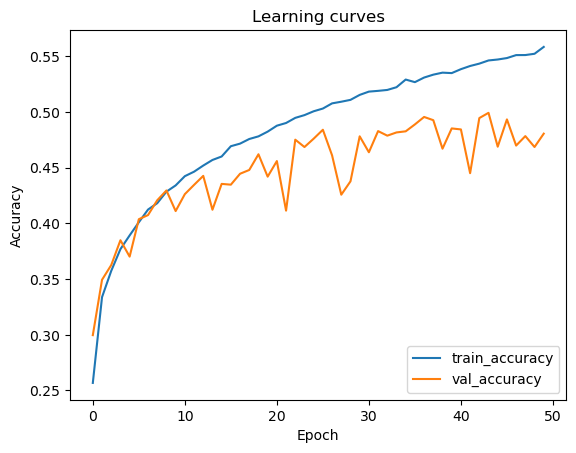

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras import regularizers
import time
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data by scaling the pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the train set into training and validation sets
val_size = 0.2
val_samples = int(X_train.shape[0] * val_size)
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

from keras.optimizers import SGD

learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer = SGD(lr=learning_rate)

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])



# Train the model using Mini-batch Stochastic Gradient Descent
batch_size = 128
epochs = 50

start_time = time.time()

history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

end_time = time.time()

print('Training time: {:.2f} seconds'.format(end_time - start_time))

# Plot the learning curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Learning curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [3]:
from keras.regularizers import l2

learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2 = SGD(lr=learning_rate)

model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(32, 32, 3)))
model_l2.add(Dense(128, activation='relu'))
model_l2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(10, activation='softmax'))
model_l2.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2, metrics=['accuracy'])


history_l2 = model_l2.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 2.1258 - accuracy: 0.2640 - val_loss: 1.9877 - val_accuracy: 0.3163
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9573 - accuracy: 0.3371 - val_loss: 1.9418 - val_accuracy: 0.3388
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8893 - accuracy: 0.3628 - val_loss: 1.8671 - val_accuracy: 0.3712
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8392 - accuracy: 0.3837 - val_loss: 1.8436 - val_accuracy: 0.3723
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 1.8047 - accuracy: 0.3941 - val_loss: 1.7691 - val_accuracy: 0.4054
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 1.7721 - accuracy: 0.4063 - val_loss: 1.7497 - val_accuracy: 0.4080
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7481 - accuracy: 0.4147 - val_loss: 1.7488 - val_accuracy: 0.4090
Epoch 

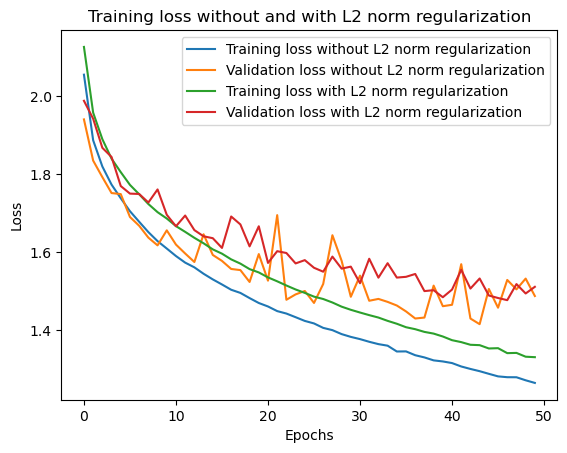

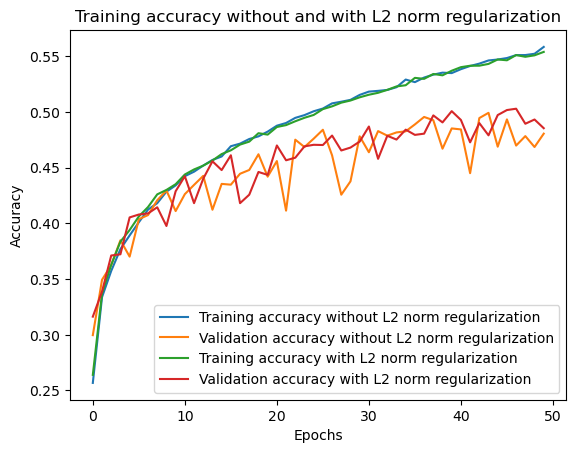

In [4]:
#Compare with the model without L2 norm regularization

def plot_compare_learning_curves_loss(train_losses_1, val_losses_1, train_losses_2, val_losses_2, title, xlabel, ylabel):
    plt.plot(train_losses_1, label='Training loss without L2 norm regularization')
    plt.plot(val_losses_1, label='Validation loss without L2 norm regularization')
    plt.plot(train_losses_2, label='Training loss with L2 norm regularization')
    plt.plot(val_losses_2, label='Validation loss with L2 norm regularization')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
def plot_compare_learning_curves_accuracy(train_accuracy_1, val_accuracy_1, train_accuracy_2, val_accuracy_2, title, xlabel, ylabel):
    plt.plot(train_accuracy_1, label='Training accuracy without L2 norm regularization')
    plt.plot(val_accuracy_1, label='Validation accuracy without L2 norm regularization')
    plt.plot(train_accuracy_2, label='Training accuracy with L2 norm regularization')
    plt.plot(val_accuracy_2, label='Validation accuracy with L2 norm regularization')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_loss(history.history['loss'], history.history['val_loss'], history_l2.history['loss'], history_l2.history['val_loss'], 'Training loss without and with L2 norm regularization', 'Epochs', 'Loss')
plot_compare_learning_curves_accuracy(history.history['accuracy'], history.history['val_accuracy'], history_l2.history['accuracy'], history_l2.history['val_accuracy'], 'Training accuracy without and with L2 norm regularization', 'Epochs', 'Accuracy')

In [5]:
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr = SGD(lr=learning_rate)

model_l2_dr = Sequential()
model_l2_dr.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr.add(Dense(128, activation='relu'))
model_l2_dr.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr.add(Dropout(0.2))
model_l2_dr.add(Dense(10, activation='softmax'))
model_l2_dr.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr, metrics=['accuracy'])


history_l2_dr = model_l2_dr.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 2.1835 - accuracy: 0.2331 - val_loss: 2.0736 - val_accuracy: 0.2857
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 2.0290 - accuracy: 0.3030 - val_loss: 1.9611 - val_accuracy: 0.3351
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9650 - accuracy: 0.3303 - val_loss: 1.8924 - val_accuracy: 0.3594
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9186 - accuracy: 0.3475 - val_loss: 1.8574 - val_accuracy: 0.3716
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8825 - accuracy: 0.3619 - val_loss: 1.8326 - val_accuracy: 0.3814
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8517 - accuracy: 0.3726 - val_loss: 1.8131 - val_accuracy: 0.3901
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8258 - accuracy: 0.3801 - val_loss: 1.7761 - val_accuracy: 0.3912
Epoch

In [6]:
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr2 = SGD(lr=learning_rate)

model_l2_dr2 = Sequential()
model_l2_dr2.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr2.add(Dense(128, activation='relu'))
model_l2_dr2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr2.add(Dropout(0.3))
model_l2_dr2.add(Dense(10, activation='softmax'))
model_l2_dr2.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr2, metrics=['accuracy'])


history_l2_dr2 = model_l2_dr2.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
313/313 [==============================] - 4s 10ms/step - loss: 2.2098 - accuracy: 0.2261 - val_loss: 2.0538 - val_accuracy: 0.3159
Epoch 2/50
313/313 [==============================] - 3s 10ms/step - loss: 2.0486 - accuracy: 0.2906 - val_loss: 1.9464 - val_accuracy: 0.3473
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9870 - accuracy: 0.3165 - val_loss: 1.8998 - val_accuracy: 0.3578
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9397 - accuracy: 0.3354 - val_loss: 1.8720 - val_accuracy: 0.3627
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9083 - accuracy: 0.3509 - val_loss: 1.8406 - val_accuracy: 0.3843
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8824 - accuracy: 0.3582 - val_loss: 1.8137 - val_accuracy: 0.3905
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.8585 - accuracy: 0.3695 - val_loss: 1.7906 - val_accuracy: 0.4010
Epoc

In [7]:
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr3 = SGD(lr=learning_rate)

model_l2_dr3 = Sequential()
model_l2_dr3.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr3.add(Dense(128, activation='relu'))
model_l2_dr3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr3.add(Dropout(0.5))
model_l2_dr3.add(Dense(10, activation='softmax'))
model_l2_dr3.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr3, metrics=['accuracy'])


history_l2_dr3 = model_l2_dr3.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 2.2718 - accuracy: 0.1961 - val_loss: 2.1162 - val_accuracy: 0.2769
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 2.1307 - accuracy: 0.2584 - val_loss: 2.0125 - val_accuracy: 0.3382
Epoch 3/50
313/313 [==============================] - 3s 9ms/step - loss: 2.0658 - accuracy: 0.2850 - val_loss: 1.9776 - val_accuracy: 0.3277
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 2.0200 - accuracy: 0.3043 - val_loss: 1.9137 - val_accuracy: 0.3696
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9855 - accuracy: 0.3176 - val_loss: 1.8737 - val_accuracy: 0.3729
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9592 - accuracy: 0.3301 - val_loss: 1.8795 - val_accuracy: 0.3699
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 1.9306 - accuracy: 0.3431 - val_loss: 1.8456 - val_accuracy: 0.3735
Epoch

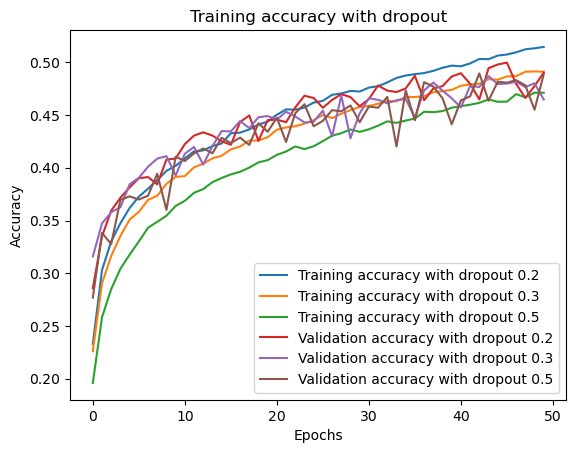

In [9]:
def plot_compare_learning_curves_accuracy_dropout(history_l2_drt,history_l2_drt2,history_l2_drt3,history_l2_dr,history_l2_dr2, history_l2_dr3, title, xlabel, ylabel):
    plt.plot(history_l2_drt, label='Training accuracy with dropout 0.2')
    plt.plot(history_l2_drt2, label='Training accuracy with dropout 0.3')
    plt.plot(history_l2_drt3, label='Training accuracy with dropout 0.5')
    plt.plot(history_l2_dr, label='Validation accuracy with dropout 0.2')
    plt.plot(history_l2_dr2, label='Validation accuracy with dropout 0.3')
    plt.plot(history_l2_dr3, label='Validation accuracy with dropout 0.5')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_accuracy_dropout(history_l2_dr.history['accuracy'], history_l2_dr2.history['accuracy'], history_l2_dr3.history['accuracy'], history_l2_dr.history['val_accuracy'],  history_l2_dr2.history['val_accuracy'], history_l2_dr3.history['val_accuracy'], 'Training accuracy with dropout', 'Epochs', 'Accuracy')

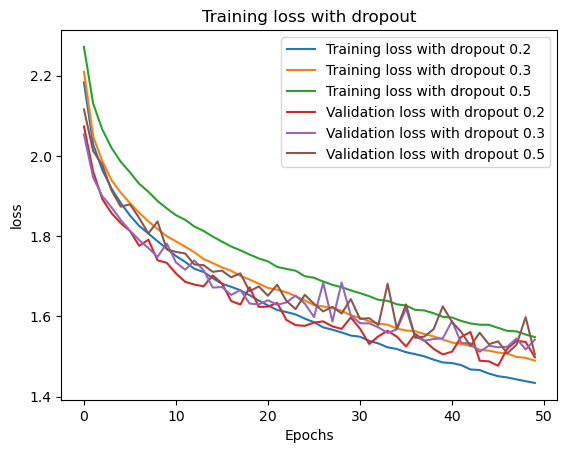

In [10]:
def plot_compare_learning_curves_loss_dropout(history_l2_drt,history_l2_drt2,history_l2_drt3,history_l2_dr,history_l2_dr2, history_l2_dr3, title, xlabel, ylabel):
    plt.plot(history_l2_drt, label='Training loss with dropout 0.2')
    plt.plot(history_l2_drt2, label='Training loss with dropout 0.3')
    plt.plot(history_l2_drt3, label='Training loss with dropout 0.5')
    plt.plot(history_l2_dr, label='Validation loss with dropout 0.2')
    plt.plot(history_l2_dr2, label='Validation loss with dropout 0.3')
    plt.plot(history_l2_dr3, label='Validation loss with dropout 0.5')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_loss_dropout(history_l2_dr.history['loss'], history_l2_dr2.history['loss'], history_l2_dr3.history['loss'], history_l2_dr.history['val_loss'],  history_l2_dr2.history['val_loss'], history_l2_dr3.history['val_loss'], 'Training loss with dropout', 'Epochs', 'loss')

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr_es = SGD(lr=learning_rate)

model_l2_dr_es = Sequential()
model_l2_dr_es.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr_es.add(Dense(128, activation='relu'))
model_l2_dr_es.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr_es.add(Dropout(0.2))
model_l2_dr_es.add(Dense(10, activation='softmax'))
model_l2_dr_es.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr_es, metrics=['accuracy'])


history_l2_dr_es = model_l2_dr_es.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1,callbacks=[early_stopping])


E:\myLearning\ds_project1\env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
313/313 [==============================] - 4s 9ms/step - loss: 2.1736 - accuracy: 0.2398 - val_loss: 2.0416 - val_accuracy: 0.2972
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 2.0224 - accuracy: 0.3045 - val_loss: 1.9628 - val_accuracy: 0.3307
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9564 - accuracy: 0.3316 - val_loss: 1.9002 - val_accuracy: 0.3615
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9125 - accuracy: 0.3499 - val_loss: 1.8464 - val_accuracy: 0.3797
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8785 - accuracy: 0.3611 - val_loss: 1.8262 - val_accuracy: 0.3876
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8501 - accuracy: 0.3735 - val_loss: 1.8140 - val_accuracy: 0.3778
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8263 - accuracy: 0.3821 - val_loss: 1.7827 - val_accuracy: 0.4000
Epoch 

In [12]:

print('Training stopped after', early_stopping.stopped_epoch, 'epochs')


Training stopped after 49 epochs


In [13]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr_es = SGD(lr=learning_rate)

model_l2_dr_es = Sequential()
model_l2_dr_es.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr_es.add(Dense(128, activation='relu'))
model_l2_dr_es.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr_es.add(Dropout(0.2))
model_l2_dr_es.add(Dense(10, activation='softmax'))
model_l2_dr_es.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr_es, metrics=['accuracy'])


history_l2_dr_es = model_l2_dr_es.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_val, y_val), verbose=1,callbacks=[early_stopping])


Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 2.2205 - accuracy: 0.2259 - val_loss: 2.0712 - val_accuracy: 0.3084
Epoch 2/100
313/313 [==============================] - 2s 8ms/step - loss: 2.0439 - accuracy: 0.2961 - val_loss: 1.9653 - val_accuracy: 0.3343
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.9694 - accuracy: 0.3243 - val_loss: 1.8975 - val_accuracy: 0.3622
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 1.9274 - accuracy: 0.3438 - val_loss: 1.8649 - val_accuracy: 0.3685
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 1.8927 - accuracy: 0.3546 - val_loss: 1.8329 - val_accuracy: 0.3823
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 1.8667 - accuracy: 0.3688 - val_loss: 1.8055 - val_accuracy: 0.3867
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 1.8450 - accuracy: 0.3736 - val_loss: 1.7907 - val_accuracy: 0.3983

In [14]:
print('Training stopped after', early_stopping.stopped_epoch, 'epochs')


Training stopped after 40 epochs


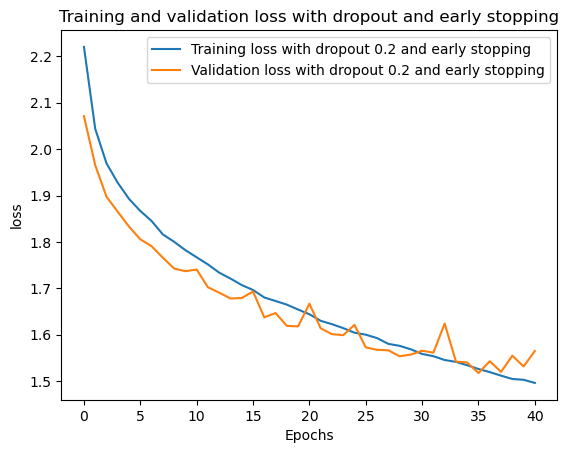

In [17]:
plt.plot(history_l2_dr_es.history['loss'], label='Training loss with dropout 0.2 and early stopping')

plt.plot(history_l2_dr_es.history['val_loss'], label='Validation loss with dropout 0.2 and early stopping')

plt.title('Training and validation loss with dropout and early stopping')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Batch normalization is a technique used to normalize the inputs of a neural network layer, specifically the activations of the neurons in the layer. This normalization process involves subtracting the mean and dividing by the standard deviation of the inputs in each mini-batch. By doing so, batch normalization helps to reduce the impact of covariate shift, which can slow down the training process and make it difficult to optimize the neural network.

To add a batch normalization layer after the first hidden layer, we can use the BatchNormalization layer provided by Keras. The BatchNormalization layer can be added after a dense or convolutional layer as shown below:

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout,Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization
import numpy as np
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical


# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data by scaling the pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the train set into training and validation sets
val_size = 0.2
val_samples = int(X_train.shape[0] * val_size)
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

epochs=50
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr_bn = SGD(lr=learning_rate)

model_l2_dr_bn = Sequential()
model_l2_dr_bn.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr_bn.add(Dense(128, activation='relu'))
model_l2_dr_bn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dr_bn.add(BatchNormalization())
model_l2_dr_bn.add(Dropout(0.2))
model_l2_dr_bn.add(Dense(10, activation='softmax'))
model_l2_dr_bn.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr_bn, metrics=['accuracy'])


history_l2_dr_bn = model_l2_dr_bn.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
313/313 [==============================] - 9s 17ms/step - loss: 2.0851 - accuracy: 0.2933 - val_loss: 1.9350 - val_accuracy: 0.3509
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 1.9099 - accuracy: 0.3560 - val_loss: 1.8916 - val_accuracy: 0.3551
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 1.8314 - accuracy: 0.3801 - val_loss: 1.7691 - val_accuracy: 0.3960
Epoch 4/50
313/313 [==============================] - 4s 11ms/step - loss: 1.7780 - accuracy: 0.3993 - val_loss: 1.7924 - val_accuracy: 0.3976
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 1.7332 - accuracy: 0.4156 - val_loss: 1.7344 - val_accuracy: 0.3955
Epoch 6/50
313/313 [==============================] - 4s 12ms/step - loss: 1.7000 - accuracy: 0.4279 - val_loss: 1.7702 - val_accuracy: 0.4031
Epoch 7/50
313/313 [==============================] - 4s 12ms/step - loss: 1.6702 - accuracy: 0.4383 - val_loss: 1.7062 - val_accuracy: 0.4325

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout,Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization
import numpy as np
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical


# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data by scaling the pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the train set into training and validation sets
val_size = 0.2
val_samples = int(X_train.shape[0] * val_size)
X_val = X_train[:val_samples]
y_val = y_train[:val_samples]
X_train = X_train[val_samples:]
y_train = y_train[val_samples:]

epochs=50
  # Add a dropout layer with rate 0.2
learning_rate = 0.01 # choose an appropriate learning rate
sgd_optimizer_l2_dr_bn = SGD(lr=learning_rate)

model_l2_dr_bn = Sequential()
model_l2_dr_bn.add(Flatten(input_shape=(32, 32, 3)))
model_l2_dr_bn.add(Dense(128, activation='relu'))
model_l2_dr_bn.add(Dense(64, activation='relu'))
model_l2_dr_bn.add(BatchNormalization())
model_l2_dr_bn.add(Dropout(0.2))
model_l2_dr_bn.add(Dense(10, activation='softmax'))
model_l2_dr_bn.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer_l2_dr_bn, metrics=['accuracy'])


history_l2_dr_bn = model_l2_dr_bn.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_val, y_val), verbose=1)


E:\myLearning\ds_project1\env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
313/313 [==============================] - 8s 18ms/step - loss: 1.9858 - accuracy: 0.2985 - val_loss: 1.8388 - val_accuracy: 0.3357
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 1.8117 - accuracy: 0.3609 - val_loss: 1.9203 - val_accuracy: 0.3189
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 1.7456 - accuracy: 0.3805 - val_loss: 1.7683 - val_accuracy: 0.3667
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 1.6911 - accuracy: 0.4029 - val_loss: 1.6955 - val_accuracy: 0.3921
Epoch 5/50
313/313 [==============================] - 4s 12ms/step - loss: 1.6527 - accuracy: 0.4141 - val_loss: 1.6461 - val_accuracy: 0.4096
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 1.6204 - accuracy: 0.4297 - val_loss: 1.6211 - val_accuracy: 0.4323
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 1.5958 - accuracy: 0.4385 - val_loss: 1.7403 - val_accuracy: 0.3879

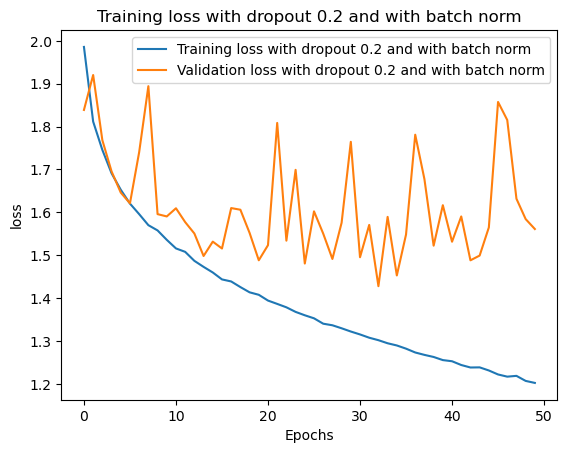

In [12]:
import matplotlib.pyplot as plt
def plot_compare_learning_curves_loss_dropout_bn(history_l2_dr_bnt,history_l2_dr_bn, title, xlabel, ylabel):
    plt.plot(history_l2_dr_bnt, label='Training loss with dropout 0.2 and with batch norm')
    plt.plot(history_l2_dr_bn, label='Validation loss with dropout 0.2 and with batch norm')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_loss_dropout_bn(history_l2_dr_bn.history['loss'], history_l2_dr_bn.history['val_loss'], 'Training loss with dropout 0.2 and with batch norm', 'Epochs', 'loss')

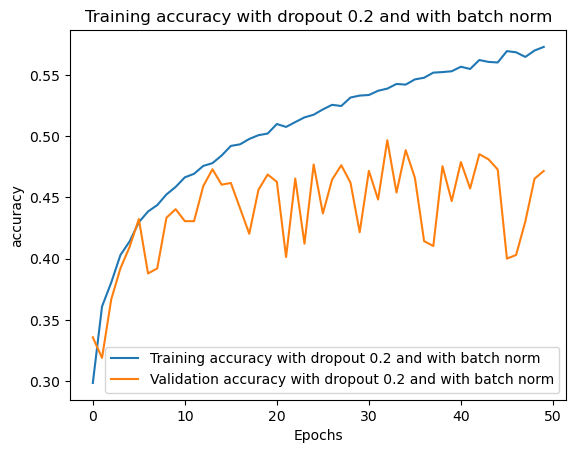

In [14]:
def plot_compare_learning_curves_accuracy_dropout_bn(history_l2_dr_bnt,history_l2_dr_bn, title, xlabel, ylabel):
    plt.plot(history_l2_dr_bnt, label='Training accuracy with dropout 0.2 and with batch norm')
    plt.plot(history_l2_dr_bn, label='Validation accuracy with dropout 0.2 and with batch norm')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_accuracy_dropout_bn(history_l2_dr_bn.history['accuracy'], history_l2_dr_bn.history['val_accuracy'], 'Training accuracy with dropout 0.2 and with batch norm', 'Epochs', 'accuracy')

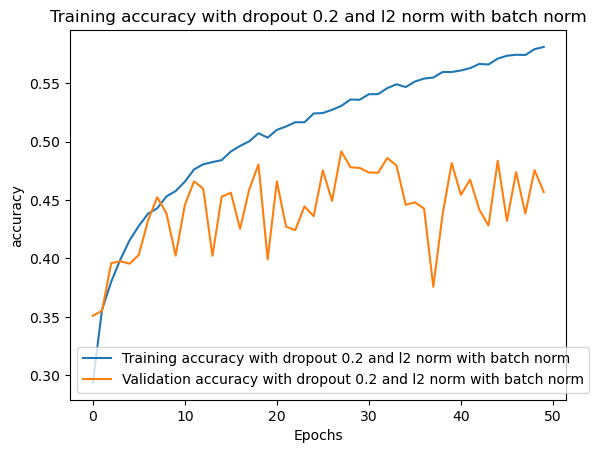

In [10]:
def plot_compare_learning_curves_accuracy_dropout_bn(history_l2_dr_bnt,history_l2_dr_bn, title, xlabel, ylabel):
    plt.plot(history_l2_dr_bnt, label='Training accuracy with dropout 0.2 and l2 norm with batch norm')
    plt.plot(history_l2_dr_bn, label='Validation accuracy with dropout 0.2 and l2 norm with batch norm')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
plot_compare_learning_curves_accuracy_dropout_bn(history_l2_dr_bn.history['accuracy'], history_l2_dr_bn.history['val_accuracy'], 'Training accuracy with dropout 0.2 and l2 norm with batch norm', 'Epochs', 'accuracy')

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization
import numpy as np
from keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    optimizer = SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
# Define the hyperparameter space to search over
param_distributions = {
    'dropout_rate': [0.2, 0.3, 0.5],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

#param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_distributions, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\DELL\AppData\Local\Temp\ipykernel_30036\4095885997.py:39: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_13" "                 f"(type Sequential).
    
    Input 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_13" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_13" "                 f"(type Sequential).
    
    Input 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_13" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_39" "                 f"(type Sequential).
    
    Input 0 of layer "dense_78" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_39" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_28" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_28" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_13" "                 f"(type Sequential).
    
    Input 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_13" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_28" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_33" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_40" "                 f"(type Sequential).
    
    Input 0 of layer "dense_81" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_40" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_29" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_31" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_29" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" "                 f"(type Sequential).
    
    Input 0 of layer "dense_29" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_14" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_31" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_31" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_36" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_41" "                 f"(type Sequential).
    
    Input 0 of layer "dense_84" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_41" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_32" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_32" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_34" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_15" "                 f"(type Sequential).
    
    Input 0 of layer "dense_32" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_15" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_34" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_34" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_42" "                 f"(type Sequential).
    
    Input 0 of layer "dense_87" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_42" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_35" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_39" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_35" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_16" "                 f"(type Sequential).
    
    Input 0 of layer "dense_35" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_16" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_37" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_43" "                 f"(type Sequential).
    
    Input 0 of layer "dense_90" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_43" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_38" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_42" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_38" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_40" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_17" "                 f"(type Sequential).
    
    Input 0 of layer "dense_38" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_17" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_40" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_40" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_41" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_44" "                 f"(type Sequential).
    
    Input 0 of layer "dense_93" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_44" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_45" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_41" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_43" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_18" "                 f"(type Sequential).
    
    Input 0 of layer "dense_41" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_18" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_43" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_43" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_44" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_48" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_45" "                 f"(type Sequential).
    
    Input 0 of layer "dense_96" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_45" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_44" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_46" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_19" "                 f"(type Sequential).
    
    Input 0 of layer "dense_44" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_19" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_46" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_46" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_47" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_51" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_46" "                 f"(type Sequential).
    
    Input 0 of layer "dense_99" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_46" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_47" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_49" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_49" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_20" "                 f"(type Sequential).
    
    Input 0 of layer "dense_47" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_20" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_49" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_54" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_50" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_47" "                 f"(type Sequential).
    
    Input 0 of layer "dense_102" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_47" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_50" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_52" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_21" "                 f"(type Sequential).
    
    Input 0 of layer "dense_50" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_21" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_52" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_52" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_57" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_48" "                 f"(type Sequential).
    
    Input 0 of layer "dense_105" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_48" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_53" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_53" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_55" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "dense_53" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_55" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_55" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_60" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_49" "                 f"(type Sequential).
    
    Input 0 of layer "dense_108" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_49" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_56" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_58" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_56" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_23" "                 f"(type Sequential).
    
    Input 0 of layer "dense_56" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_23" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_58" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_58" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_50" "                 f"(type Sequential).
    
    Input 0 of layer "dense_111" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_50" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_63" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (64, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(64, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_59" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_61" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_61" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_59" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_24" "                 f"(type Sequential).
    
    Input 0 of layer "dense_59" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_24" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_61" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_51" "                 f"(type Sequential).
    
    Input 0 of layer "dense_114" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_51" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_66" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_52" "                 f"(type Sequential).
    
    Input 0 of layer "dense_117" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_52" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_62" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_62" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_64" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_64" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_69" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_25" "                 f"(type Sequential).
    
    Input 0 of layer "dense_62" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_25" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_64" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_65" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_65" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_53" "                 f"(type Sequential).
    
    Input 0 of layer "dense_120" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_53" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_67" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_67" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_72" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_26" "                 f"(type Sequential).
    
    Input 0 of layer "dense_65" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_26" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_67" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_68" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_68" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_30" "                 f"(type Sequential).
    
    Input 0 of layer "dense_75" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_30" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_70" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_54" "                 f"(type Sequential).
    
    Input 0 of layer "dense_123" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_54" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_70" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_70" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_27" "                 f"(type Sequential).
    
    Input 0 of layer "dense_68" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_27" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_71" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_71" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_31" "                 f"(type Sequential).
    
    Input 0 of layer "dense_78" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_31" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_73" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_55" "                 f"(type Sequential).
    
    Input 0 of layer "dense_126" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_55" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filei6dffzsq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_28" "                 f"(type Sequential).
    
    Input 0 of layer "dense_71" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_28" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileviqvhk2c.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_73" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file1m1xrga0.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_73" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_fileby30stkq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_74" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file5zg190o7.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_29" "                 f"(type Sequential).
    
    Input 0 of layer "dense_74" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_29" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file2jdd1zwe.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_32" "                 f"(type Sequential).
    
    Input 0 of layer "dense_81" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_32" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file575_e7yq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_30" "                 f"(type Sequential).
    
    Input 0 of layer "dense_76" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_30" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file64q8a9dp.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_56" "                 f"(type Sequential).
    
    Input 0 of layer "dense_129" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_56" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=uint8)
      • training=True
      • mask=None



In [8]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import SGD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization
import numpy as np
from keras.regularizers import l2

# Define a function to create the model
def create_model(learning_rate=0.01, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    optimizer = SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_train_full = X_train_full[:25000]
y_train_full = y_train_full[:25000]
# Define the hyperparameter space to search over
param_distributions = {
    'dropout_rate': [0.2, 0.3, 0.5],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

# Create a Keras classifier wrapper
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

# Use RandomizedSearchCV to search over the hyperparameter space
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=kfold, n_jobs=-1)
search_results = search.fit(X_train_full, y_train_full)

# Print the best results and parameters
print('Best Score: ', search_results.best_score_)
print('Best Params: ', search_results.best_params_)


C:\Users\DELL\AppData\Local\Temp\ipykernel_30036\2335706098.py:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" "                 f"(type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_1" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebtr8__gs.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filehhg_0wsk.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file0swkrcy3.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (32, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filetstsrrxq.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedzda20db.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filebma_if37.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" "                 f"(type Sequential).
    
    Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_5" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_filedjrd5gfw.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" "                 f"(type Sequential).
    
    Input 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_6" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "E:\myLearning\ds_project1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\DELL\AppData\Local\Temp\__autograph_generated_file92aerexo.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\myLearning\ds_project1\env\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_6" "                 f"(type Sequential).
    
    Input 0 of layer "dense_18" is incompatible with the layer: expected axis -1 of input shape to have value 32, but received input with shape (None, 32, 32, 3)
    
    Call arguments received by layer "sequential_6" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None

